In [1]:
import os
from keras import layers
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from os import listdir, makedirs
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications import VGG16, ResNet50, VGG19, InceptionV3, MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, Activation, MaxPooling2D, BatchNormalization
from keras import optimizers, regularizers
from keras.optimizers import SGD
from glob import glob
import cv2
import glob
from keras import backend as K
import numpy as np 
import pandas as pd 
import os
from keras import layers
from keras import models, Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from os import listdir, makedirs
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16, ResNet50, VGG19, InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import load_img
from keras import optimizers, regularizers
from keras.optimizers import SGD
from glob import glob
import cv2
from keras.callbacks import EarlyStopping, Callback
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
import h5py
from PIL import Image
from sklearn.model_selection import train_test_split
data_dir = '../input/'

In [2]:
train_path='../input/state-farm-distracted-driver-detection/imgs/train/'

In [3]:
RESOLUTION = 150
BATCH_SIZE=128

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training", color_mode='grayscale')

val_generator = val_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation",  color_mode='grayscale')

Found 15702 images belonging to 10 classes.
Found 6722 images belonging to 10 classes.


In [4]:
def read_image(path):
    image = cv2.imread(path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

labels = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

col = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5':'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

//tc0 : safe driving


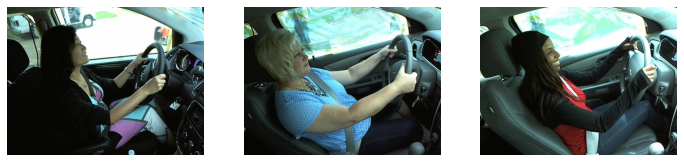

//tc1 : texting - right


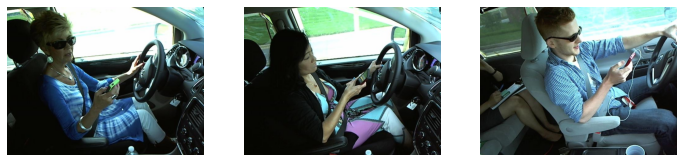

//tc2 : talking on the phone - right


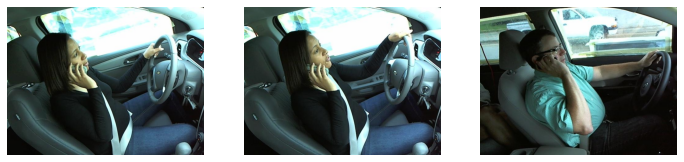

//tc3 : texting - left


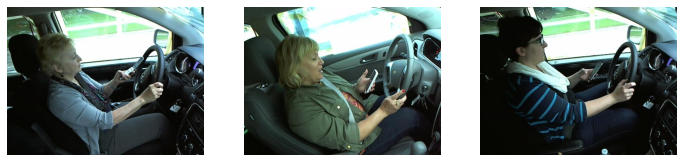

//tc4 : talking on the phone - left


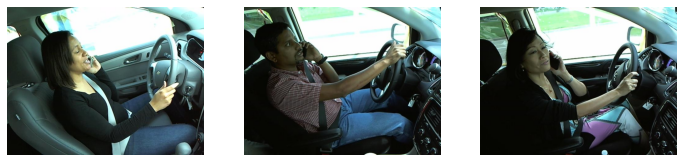

//tc5 : operating the radio


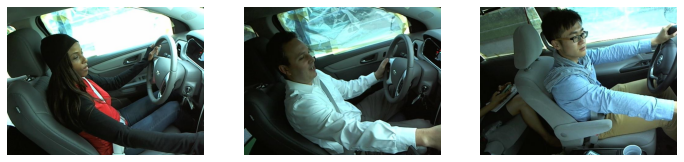

//tc6 : drinking


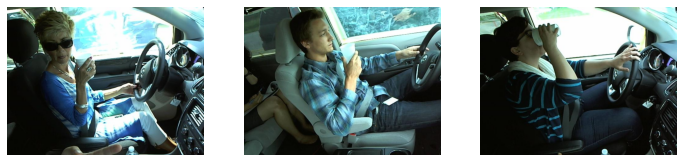

//tc7 : reaching behind


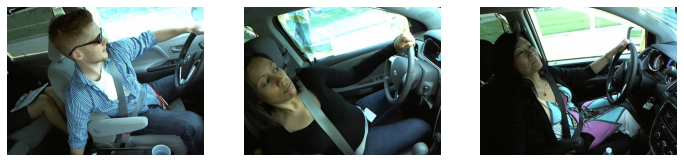

//tc8 : hair and makeup


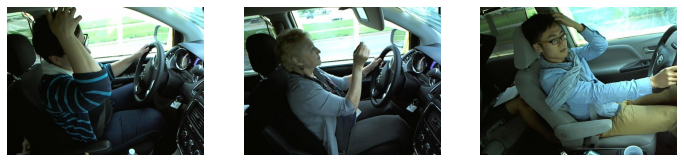

//tc9 : talking to passenger


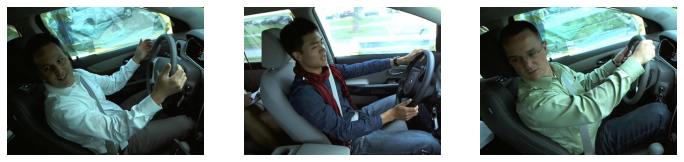

In [5]:
for label in labels:
    f, ax = plt.subplots(figsize=(12, 10))
    files = glob('{}/state-farm-distracted-driver-detection/imgs/train/{}/*.jpg'.format(data_dir, label))
    
    print('//t{} : {}'.format(label, col[label]))
    for x in range(3):
        plt.subplot(3, 3, x+1)
        image = read_image(files[x])
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [6]:
def create_model():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",trainable=False))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",trainable=False))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",trainable=False))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",trainable=False))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu",trainable=False))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",trainable=False))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",trainable=False))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu",trainable=False))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.33))
    model.add(Dense(32, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation = 'softmax')) 
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

    

In [7]:
model=create_model()

In [8]:
def train(model, filepath):
    
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    
    n_train = 15702
    batch_size = 300
    n_valid = 6722
    history = model.fit_generator(
           train_generator,
           steps_per_epoch=n_train//batch_size,
           epochs=25,
           validation_data=val_generator,
           validation_steps=n_valid//batch_size,  callbacks=callbacks_list)
    
    
    # Plot
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

    return model

Epoch 1/25
52/52 [==============================] - 76s 1s/step - loss: 2.0889 - accuracy: 0.2766 - val_loss: 9.9483 - val_accuracy: 0.0916
Epoch 2/25
52/52 [==============================] - 69s 1s/step - loss: 1.5271 - accuracy: 0.4627 - val_loss: 16.4313 - val_accuracy: 0.0866
Epoch 3/25
52/52 [==============================] - 64s 1s/step - loss: 1.1530 - accuracy: 0.6193 - val_loss: 21.0428 - val_accuracy: 0.0998
Epoch 4/25
52/52 [==============================] - 62s 1s/step - loss: 0.8507 - accuracy: 0.7390 - val_loss: 24.9022 - val_accuracy: 0.1048
Epoch 5/25
52/52 [==============================] - 61s 1s/step - loss: 0.6103 - accuracy: 0.8244 - val_loss: 23.4729 - val_accuracy: 0.1009
Epoch 6/25
52/52 [==============================] - 60s 1s/step - loss: 0.6715 - accuracy: 0.7882 - val_loss: 19.6786 - val_accuracy: 0.0927
Epoch 7/25
52/52 [==============================] - 59s 1s/step - loss: 0.4430 - accuracy: 0.8750 - val_loss: 16.5648 - val_accuracy: 0.1065
Epoch 8/25
52/

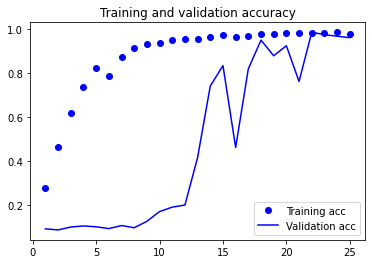

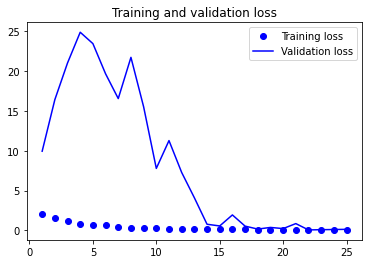

In [9]:
model = train(model, "weights_best.h5")

operating the radio


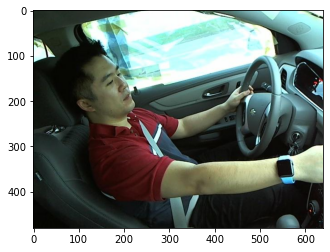

In [10]:
import tensorflow as tf

model.save('model.h5')

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

image_path = "../input/state-farm-distracted-driver-detection/imgs/train/c5/img_10000.jpg"
image = load_img(path=image_path, color_mode="grayscale",
                                              target_size=(224, 224))
input_arr = img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
print(col[labels[np.argmax(predictions[0])]])

#col
image = read_image(image_path)
plt.imshow(image)
plt.show()

In [11]:
labels[np.argmax(predictions[0])]

'c5'

In [12]:
predictions[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
predictions

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)